## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

"""
建立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense

def build_mlp(input_dim, layer_output_units, output_units, regularizer):
    model = Sequential()
    for i, untis in enumerate(layer_output_units):  
        if i == 0:
            model.add(Dense(units=untis, 
                            input_dim=input_dim,
                            kernel_initializer='normal',
                            kernel_regularizer=regularizer, 
                            activation='relu'))
        else:
            model.add(Dense(units=untis,
                            kernel_initializer='normal',
                            kernel_regularizer=regularizer, 
                            activation='relu'))
    model.add(Dense(units=output_units,
                kernel_initializer='normal', 
                activation='softmax'))
    return model  

In [6]:
"""
訓練模型
"""
def complie_train_model(model, optimizer,epochs, batch_size, x_train, y_train, x_test, y_test):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    return model

In [7]:
"""
以視覺畫方式檢視訓練過程
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show_train_history(results):
    for i, result in enumerate(results):
        history = result["model"].history.history
        tag = "({})".format(result["tag"])
        df_acc = pd.DataFrame({"acc"+tag:history["acc"], "val_acc"+tag:history["val_acc"]})
        df_loss = pd.DataFrame({"loss"+tag:history["loss"], "val_loss"+tag:history["val_loss"]})
        if i ==0:
            df_acc_results = df_acc.copy()
            df_loss_results = df_loss.copy()
        else:
            df_acc_results= pd.concat([df_acc_results, df_acc], axis=1)
            df_loss_results= pd.concat([df_loss_results, df_loss], axis=1)    

    fig, ax = plt.subplots(1,2, figsize=(18,5))
    
    styles = ['bs-','ro-','y^-', 'g--']    
    g1 = df_acc_results.plot.line(style=styles, ax=ax[0])
    g1.set_xlabel("Epoch")
    g1.set_ylabel("Acc") 
    
    g2 = df_loss_results.plot.line(style=styles, ax=ax[1])
    g2.set_xlabel("Epoch")
    g2.set_ylabel("Loss") 
    return df_acc_results, df_loss_results

# Test keras.regularizers.l2(l2)

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [9]:
results = list()
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for l2 in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Executing l2={}".format(l2))
    regularizer = keras.regularizers.l2(l2)
    model = build_mlp(input_dim=x_train.shape[1], layer_output_units=[256,128], output_units=10, regularizer=regularizer)
    optimizer =  keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model = complie_train_model(model, optimizer,EPOCHS, BATCH_SIZE, x_train, y_train, x_test, y_test)
    results.append({"tag":l2, "model":model})

Executing l2=0.01
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 21s 424us/step - loss: 21.3838 - acc: 0.2194 - val_loss: 19.7839 - val_acc: 0.2946
Epoch 2/25
50000/50000 [==============================] - 19s 385us/step - loss: 18.4004 - acc: 0.3150 - val_loss: 17.0862 - val_acc: 0.3374
Epoch 3/25
50000/50000 [==============================] - 25s 495us/step - loss: 15.9350 - acc: 0.3438 - val_loss: 14.8277 - val_acc: 0.3572
Epoch 4/25
50000/50000 [==============================] - 27s 550us/step - loss: 13.8530 - acc: 0.3615 - val_loss: 12.9125 - val_acc: 0.3653
Epoch 5/25
50000/50000 [==============================] - 30s 601us/step - loss: 12.0785 - acc: 0.3720 - val_loss: 11.2807 - val_acc: 0.3775
Epoch 6/25
50000/50000 [==============================] - 30s 601us/step - loss: 10.5656 - acc: 0.3807 - va

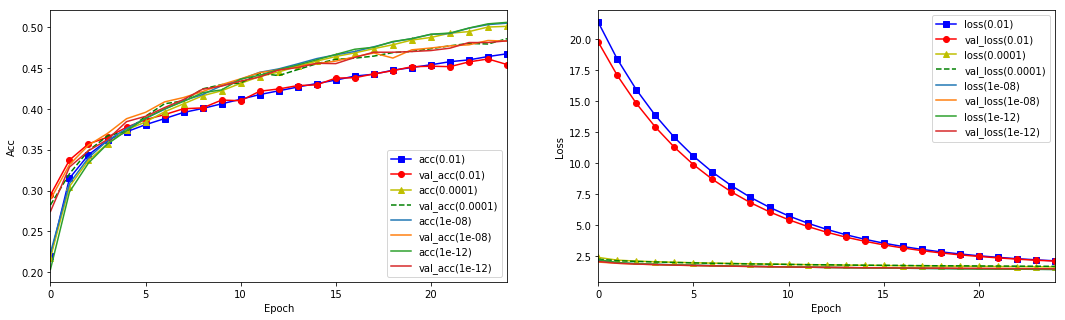

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
df_acc_results, df_loss_results = show_train_history(results)

In [11]:
df_acc_results

,acc(0.01),val_acc(0.01),acc(0.0001),val_acc(0.0001),acc(1e-08),val_acc(1e-08),acc(1e-12),val_acc(1e-12)
0,0.21938,0.2946,0.21812,0.2824,0.22394,0.2892,0.20352,0.2744
1,0.31504,0.3374,0.30502,0.3206,0.30878,0.3317,0.29838,0.3288
2,0.34380,0.3572,0.33710,0.3490,0.34020,0.3556,0.33380,0.3488
3,0.36152,0.3653,0.35740,0.3669,0.36134,0.3700,0.35716,0.3625
4,0.37202,0.3775,0.37446,0.3727,0.37600,0.3880,0.37326,0.3844
5,0.38066,0.3868,0.38400,0.3910,0.38828,0.3958,0.38874,0.3909
6,0.38812,0.3930,0.39650,0.4063,0.39956,0.4086,0.40010,0.4016
7,0.39568,0.4002,0.40622,0.4098,0.41012,0.4139,0.40918,0.4115
8,0.40048,0.4012,0.41610,0.4245,0.41760,0.4212,0.41982,0.4241
9,0.40624,0.4108,0.42218,0.4297,0.42842,0.4297,0.42326,0.4279


In [12]:
df_loss_results

,loss(0.01),val_loss(0.01),loss(0.0001),val_loss(0.0001),loss(1e-08),val_loss(1e-08),loss(1e-12),val_loss(1e-12)
0,21.383819,19.783852,2.373689,2.229036,2.143609,2.000304,2.189832,2.045290
1,18.400359,17.086175,2.154171,2.108194,1.943813,1.897636,1.962950,1.903198
2,15.934987,14.827688,2.076343,2.052828,1.866175,1.838834,1.868785,1.837779
3,13.852975,12.912524,2.024720,2.006176,1.814622,1.789227,1.815311,1.794652
4,12.078504,11.280695,1.981205,1.968821,1.773011,1.750253,1.773296,1.752763
5,10.565585,9.879180,1.945266,1.931914,1.737497,1.719299,1.738562,1.721360
6,9.274286,8.689293,1.913817,1.898384,1.707216,1.691841,1.706933,1.695007
7,8.171709,7.671273,1.884590,1.872280,1.677952,1.665496,1.679169,1.667429
8,7.229910,6.800968,1.859351,1.849175,1.652507,1.648009,1.653339,1.640985
9,6.424904,6.060279,1.835361,1.830300,1.628454,1.621043,1.628326,1.623987


# Test keras.regularizers.l1_l2(l1=l1l2, l2=l1l2)

In [ ]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [14]:
results = list()
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for l1l2 in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Executing l1=l2={}".format(l1l2))
    regularizer = keras.regularizers.l1_l2(l1=l1l2, l2=l1l2)
    model = build_mlp(input_dim=x_train.shape[1], layer_output_units=[256,128], output_units=10, regularizer=regularizer)
    optimizer =  keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model = complie_train_model(model, optimizer,EPOCHS, BATCH_SIZE, x_train, y_train, x_test, y_test)
    results.append({"tag":l1l2, "model":model})

50000/50000 [==============================] - 15s 293us/step - loss: 2.3778 - acc: 0.0965 - val_loss: 2.3777 - val_acc: 0.1000
Epoch 22/25
50000/50000 [==============================] - 15s 291us/step - loss: 2.3778 - acc: 0.0975 - val_loss: 2.3778 - val_acc: 0.1000
Epoch 23/25
50000/50000 [==============================] - 14s 289us/step - loss: 2.3778 - acc: 0.0994 - val_loss: 2.3778 - val_acc: 0.1000
Epoch 24/25
50000/50000 [==============================] - 14s 280us/step - loss: 2.3778 - acc: 0.0979 - val_loss: 2.3777 - val_acc: 0.1000
Epoch 25/25
50000/50000 [==============================] - 14s 282us/step - loss: 2.3777 - acc: 0.0975 - val_loss: 2.3777 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 16s 324us/step - loss: 5.6186 - acc: 0.2123 - val_loss: 5.4610 - val_acc: 0.2940
Epoch 2/25
50000/50000 [==============================] - 14s 280us/step - loss: 5.3678 - acc: 0.3145 - val_loss: 5.2988 - 

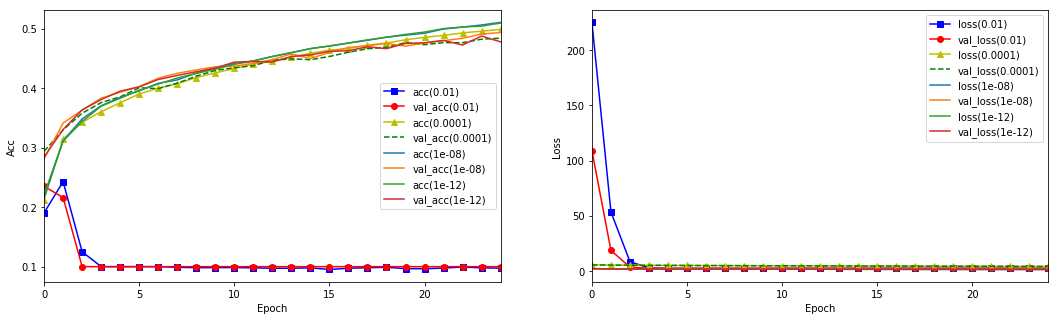

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
df_acc_results, df_loss_results = show_train_history(results)

In [16]:
df_acc_results

,acc(0.01),val_acc(0.01),acc(0.0001),val_acc(0.0001),acc(1e-08),val_acc(1e-08),acc(1e-12),val_acc(1e-12)
0,0.19040,0.2351,0.21234,0.2940,0.21584,0.2811,0.22098,0.2845
1,0.24308,0.2162,0.31450,0.3300,0.31144,0.3414,0.31120,0.3306
2,0.12508,0.1000,0.34268,0.3580,0.34848,0.3632,0.34410,0.3635
3,0.10000,0.1000,0.36060,0.3759,0.37054,0.3831,0.36984,0.3810
4,0.10000,0.1000,0.37562,0.3855,0.38448,0.3934,0.38320,0.3951
5,0.10000,0.1000,0.39046,0.4009,0.39562,0.4026,0.39676,0.4024
6,0.10000,0.1000,0.40002,0.3994,0.40822,0.4169,0.40708,0.4147
7,0.09888,0.1000,0.40750,0.4085,0.41396,0.4251,0.41706,0.4215
8,0.09826,0.1000,0.41802,0.4203,0.42554,0.4308,0.42494,0.4278
9,0.09830,0.1000,0.42580,0.4299,0.43502,0.4361,0.43188,0.4337


In [17]:
df_loss_results

,loss(0.01),val_loss(0.01),loss(0.0001),val_loss(0.0001),loss(1e-08),val_loss(1e-08),loss(1e-12),val_loss(1e-12)
0,225.039782,108.827467,5.618636,5.461007,2.147067,2.003230,2.157267,2.005286
1,53.395068,18.582735,5.367831,5.298810,1.939785,1.884997,1.933822,1.886437
2,8.457787,3.483585,5.248954,5.208251,1.850785,1.819461,1.849522,1.818740
3,2.696678,2.404764,5.163878,5.124764,1.795800,1.770141,1.796449,1.769600
4,2.384277,2.378465,5.085661,5.054442,1.753306,1.729007,1.752875,1.734633
5,2.378137,2.377943,5.015110,4.981611,1.719492,1.698825,1.717166,1.702961
6,2.377964,2.377937,4.950086,4.921107,1.688540,1.671940,1.687941,1.674182
7,2.377952,2.377913,4.889138,4.864642,1.661939,1.646622,1.660428,1.650843
8,2.377934,2.377974,4.831061,4.808749,1.636476,1.623182,1.636540,1.629201
9,2.377920,2.377924,4.775728,4.751669,1.612962,1.612910,1.614461,1.606988
